In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = (16,8)

# handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# time series related imports
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima


In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + TRIPADVISORS INDEX + TOPIC AND SENTIMENT INTENSITY - DATA COMPOSITION 1 (70-15-15).csv', index_col="Month", parse_dates=True)
df.head()

,Tourist Arrival,Number of Posts,Number of Comments,NegativityQDAP,PositivityQDAP,TOPIC 1,TOPIC 2,TOPIC 3,TOPIC 4,TOPIC 5,TOPIC 6,TOPIC 7,TOPIC 8,TOPIC 9,TOPIC 10,Class
Month,,,,,,,,,,,,,,,,
2008-01-01,399556,403,3049,0.181818,0.090909,0.008715,0.010894,0.889993,0.011228,0.010641,0.001710,0.014932,0.027566,0.014081,0.010241,Train
2008-01-02,411032,357,3211,0.000000,0.090909,0.009085,0.010974,0.007221,0.006829,0.006410,0.005451,0.011673,0.014948,0.913561,0.013848,Train
2008-01-03,414332,344,3153,0.142857,0.000000,0.008164,0.005849,0.006917,0.009097,0.007196,0.001611,0.007281,0.005533,0.014198,0.934153,Train
2008-01-04,395900,338,3184,0.214286,0.071429,0.007528,0.013789,0.005867,0.911020,0.012191,0.001259,0.014063,0.019446,0.006807,0.008030,Train
2008-01-05,366387,369,2964,0.000000,0.100000,0.008862,0.007257,0.010529,0.011619,0.014288,0.001458,0.015968,0.915464,0.010944,0.003609,Train


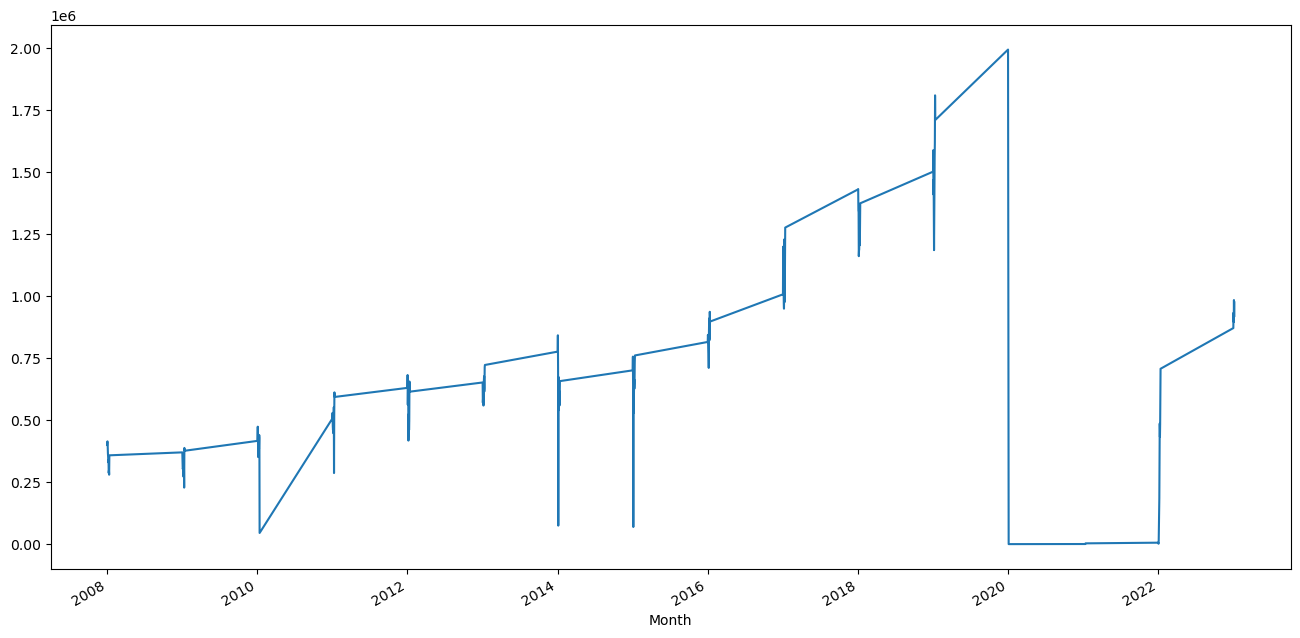

In [3]:
fig, ax = plt.subplots(figsize=(16,8))
ax = df['Tourist Arrival'].plot()
color_arr = ['g', 'r', 'm', 'b', 'y', 'k']
c_indx = 0
for x in df[df['Tourist Arrival']==1].index:
    ax.axvline(x=x, color=color_arr[c_indx], linewidth=0.5)
    if color_arr[c_indx] == 'k':
        c_indx = 0
    else:
        c_indx +=1

In [4]:
df1=df.drop(["Class"], axis=1)
print(df1)

            Tourist Arrival  Number of Posts  Number of Comments  \
Month                                                              
2008-01-01           399556              403                3049   
2008-01-02           411032              357                3211   
2008-01-03           414332              344                3153   
2008-01-04           395900              338                3184   
2008-01-05           366387              369                2964   
...                     ...              ...                 ...   
2023-01-02           932969              481                3576   
2023-01-03           895425              543                4058   
2023-01-04           984146              422                3135   
2023-01-05           916257              347                2609   
2023-01-06           975010              328                2339   

            NegativityQDAP  PositivityQDAP   TOPIC 1   TOPIC 2   TOPIC 3  \
Month                                  

In [5]:
auto_arima(df1['Tourist Arrival'], m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4947.042, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4937.754, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4938.437, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4945.121, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4948.808, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=4939.754, Time=0.14 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=4939.754, Time=0.13 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=4938.184, Time=0.05 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=4940.975, Time=0.26 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=4935.707, Time=0.07 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=4937.707, Time=0.23 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=4937.707, Time=0.18 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=4936.131, Time=0.04 sec
 ARIMA(0,1,0)(2,0,1)[12]

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [6]:
train = df1['Tourist Arrival'][:'01/02/2019'].dropna()
test = df1['Tourist Arrival']['01/03/2019':].dropna()
exog_train = df1.drop(['Tourist Arrival'], axis=1)[:'01/02/2019'].dropna()
exog_test = df1.drop(['Tourist Arrival'], axis=1)['01/03/2019':].dropna()

In [7]:
import statsmodels.api as sm
model = SARIMAX(train,order=(0,1,0),seasonal_order=(1,0,0,12),exog = exog_train,
                                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
results.summary()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18676D+01    |proj g|=  1.22890D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16      4      8      1     0     0   2.052D-06   1.187D+01
  F =   11.867266103835965     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    Tourist Arrival   No. Observations:                  134
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood               -1590.214
Date:                            Wed, 23 Aug 2023   AIC                           3212.427
Time:                                    21:11:09   BIC                           3257.160
Sample:                                         0   HQIC                          3230.595
                                            - 134                                         
Covariance Type:                              opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Number of Posts       46.3160    341.935      0.135      0.892    -623.864     716.496
Number of Comments    12.6247     33.725      0.374      0.708     -53.475      78.724
NegativityQDAP      1.773e+05   1.26e+05      1.405      0.160   -7.01e+04    4.25e+05
PositivityQDAP      1.731e+05   1.24e+05      1.394      0.163   -7.03e+04    4.17e+05
TOPIC 1            -1.151e+05   1.23e+05     -0.937      0.349   -3.56e+05    1.26e+05
TOPIC 2            -2.023e+05   5.57e+04     -3.629      0.000   -3.12e+05   -9.31e+04
TOPIC 3            -1.561e+04    6.4e+04     -0.244      0.807   -1.41e+05     1.1e+05
TOPIC 4            -1.067e+05   4.45e+04     -2.395      0.017   -1.94e+05   -1.94e+04
TOPIC 5            -5.869e+04   5.83e+04     -1.006      0.314   -1.73e+05    5.56e+04
TOPIC 6             -9.58e+04   1.15e+05     -0.833      0.405   -3.21e+05     1.3e+05
TOPIC 7            -7.924e+04   4.16e+04     -1.906      0.057   -1.61e+05    2257.158
TOPIC 8            -6.679e+04   5.57e+04     -1.199      0.230   -1.76e+05    4.24e+04
TOPIC 9            -1.225e+05   3.62e+04     -3.382      0.001   -1.94e+05   -5.15e+04
TOPIC 10           -7.893e+04   8.34e+04     -0.946      0.344   -2.42e+05    8.46e+04
ar.S.L12               0.3318      0.094      3.518      0.000       0.147       0.517
sigma2              1.524e+10      2.036   7.49e+09      0.000    1.52e+10    1.52e+10
===================================================================================
Ljung-Box (L1) (Q):                  11.98   Jarque-Bera (JB):               136.52
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                            -0.13
Prob(H) (two-sided):                  0.14   Kurtosis:                         8.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.16e+26. Standard errors may be unstable.
"""

In [8]:
start = len(train)
end = len(train) + len(test) - 1
y_pred = results.predict(start=start,end=end, exog = exog_test, dynamic=False).rename('SARIMA(0,1,0)(1,0,[0],12) Predictions')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [9]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [10]:
RMSE = np.sqrt(mean_squared_error(test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 1195956.3711015068


In [11]:
MAE = mean_absolute_error(test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 1053084.7268241486


In [12]:
MAPE = mean_absolute_percentage_error(test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 2.51561995692986e+21


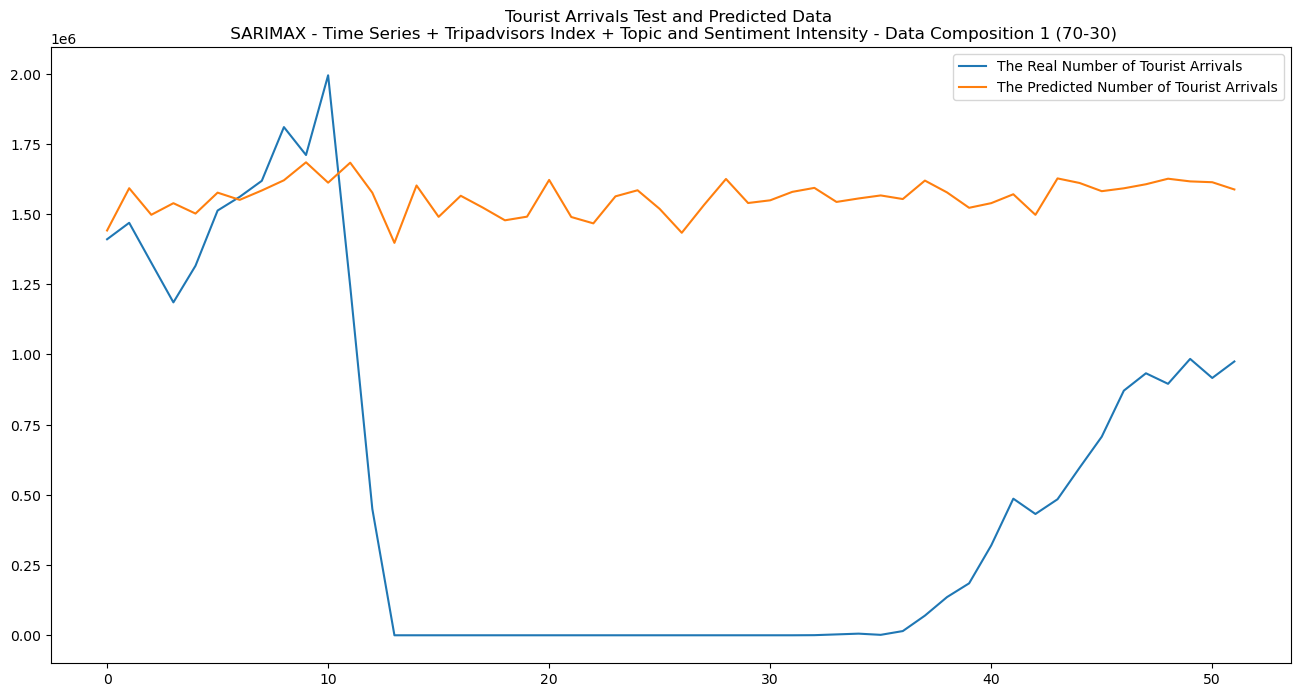

In [13]:
x_ax = range(len(test))
plt.plot(x_ax, test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n SARIMAX - Time Series + Tripadvisors Index + Topic and Sentiment Intensity - Data Composition 1 (70-30)")
plt.legend()
plt.show()